<a href="https://colab.research.google.com/github/AlfonsoVasquezC/ComputervisionMNA/blob/main/4_2_Equipo_1_Google_Colab_Algoritmos_de_mejoramiento_de_im%C3%A1genes_usando_operaciones_morfol%C3%B3gicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

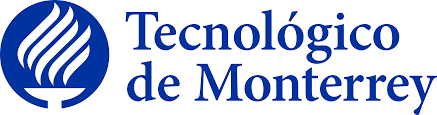

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Visión computacional para imágenes y video**
###Tecnológico de Monterrey
###Dr. Gilberto Ochoa Ruiz

## 4.2 Google Colab - Algoritmos de mejoramiento de imágenes usando operaciones morfológicas



**Por:**

* A01183284 RODRIGO RODRIGUEZ RODRIGUEZ
* A01793132 RIGOBERTO VEGA ESCUDERO
* A01016308 ALEXIS HERNANDEZ MARTINEZ
* A00820656 JUAN ALFONSO VASQUEZ CHAPOI
* A00759664 JOEL ORLANDO HERNANDEZ RAMOS

##4.2

Los ejercicios que deben agregarse a este proyecto seran las siguientes:

- Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

- Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

- Investigar una aplicación de opening y closing e implementalo en Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt
import matplotlib.image as mpig
%matplotlib inline

In [ ]:
def gethistogram(im,title):
  hist_full = cv.calcHist([im],[0],None,[256],[0,256])
  plt.plot(hist_full)
  plt.title(title)
  plt.show()

Las transformaciones morfológicas son algunas operaciones simples basadas en la forma de la imagen, que normalmente se aplican a imágenes binarias. Necesita dos entradas, una es nuestra imagen original, la segunda se llama elemento estructurante o núcleo (kernel) que decide la naturaleza de la operación.

## 1. Investigar una aplicación de erosión en procesamiento de imágenes e implementarlo en Colab

Similar a la convolución 2D, en el proceso de erosionado un kernel se desliza a través de la imagen. Un píxel de la imagen original (1 ó 0) sólo se considerará 1 si todos los píxeles que caen detro de la ventana del kernel son 1, de lo contrario se erosiona (se hace a cero). Por tanto, todos los píxeles cerca de los bordes de los objetos en la imagen serán descartados dependiendo del tamaño del kernel. Como consecuencia, el grosor o el tamaño de los objetos en primer plano disminuye o, en otras palabras, la región blanca disminuye en la imagen. Este procedimiento es útil para eliminar pequeños ruidos blancos, separar dos objetos conectados, etc.

La erosión resulta especialmente útil para afinar el contorno de objetos en una fotografía digital, particularmente en el caso de imágenes médicas o de escritura a mano (OCR), donde lo que más nos interesa es el perímetro de las figuras o caracteres.

Orginal 



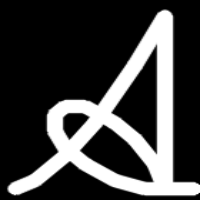

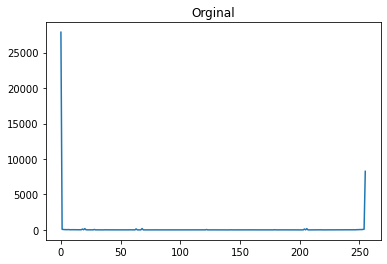

Erosionada 



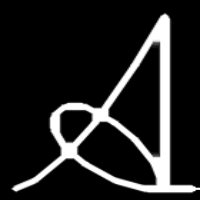

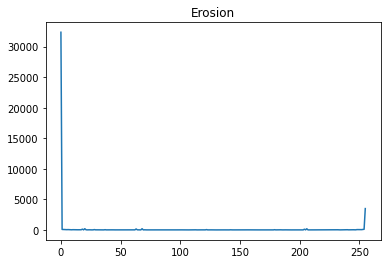

In [ ]:
urlErosion = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/4.2 Images/A.png"
img_Erosion = cv.imread(urlErosion,cv.IMREAD_GRAYSCALE) 
img_Erosion = cv.resize(img_Erosion, (200,200))

kernel = np.ones((7,7),np.uint8)
erosion = cv.erode(img_Erosion,kernel,iterations = 1)

print("Orginal \n")
cv2_imshow(img_Erosion)
gethistogram(img_Erosion,"Orginal")


print("Erosionada \n")
cv2_imshow(erosion)
gethistogram(erosion,"Erosion")


Orginal 



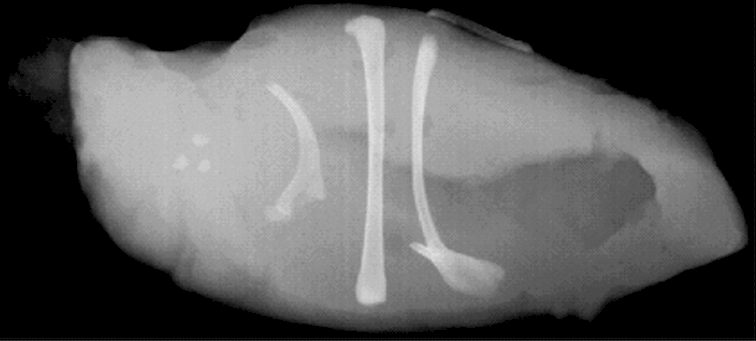

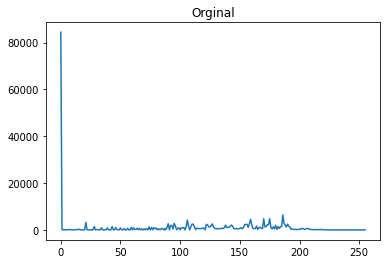

Threshold 



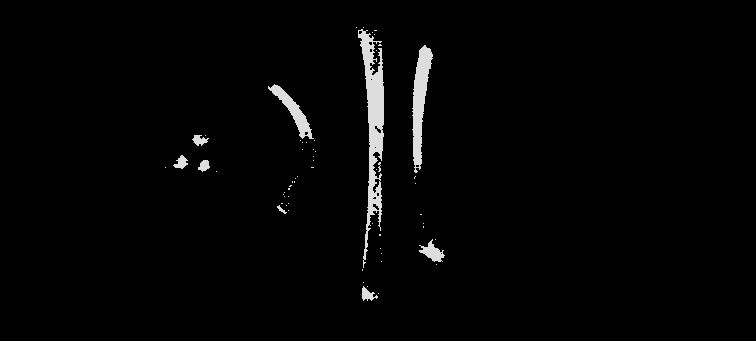

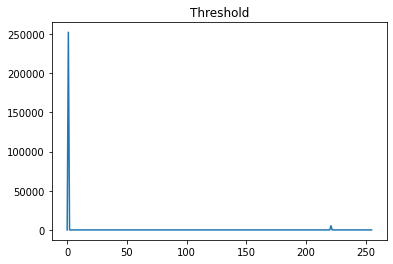

Erosionada 



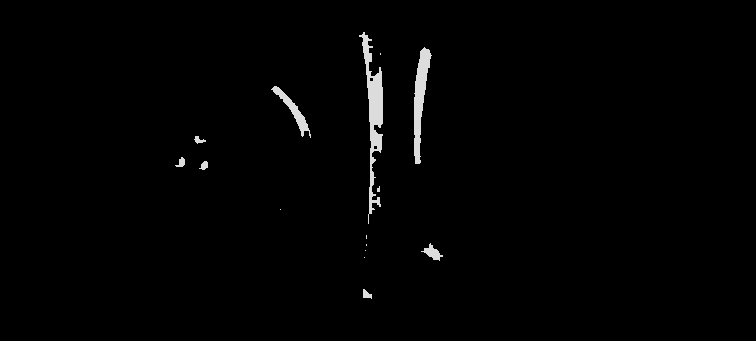

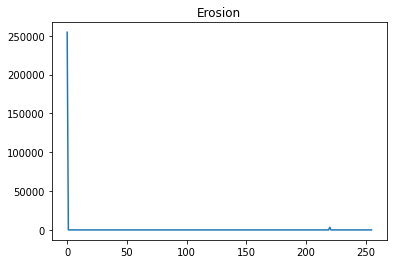

In [ ]:
urlErosion = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/4.2 Images/eroded image aplicatin.PNG"
img_Erosion = cv.imread(urlErosion,cv.IMREAD_GRAYSCALE) 
# img_Erosion = cv.resize(img_Erosion, (200,200))

ret, th = cv.threshold(img_Erosion, 200, 220, cv.THRESH_BINARY)
th2 = th - 255

kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(th,kernel,iterations = 1)

print("Orginal \n")
cv2_imshow(img_Erosion)
gethistogram(img_Erosion,"Orginal")


print("Threshold \n")
cv2_imshow(th2)
gethistogram(th2,"Threshold")

print("Erosionada \n")
cv2_imshow(erosion)
gethistogram(erosion,"Erosion")

##2. Investigar una aplicación de dilatación en procesamiento de imágenes e implementarlo en Colab

El proceso de dilatación es justo lo opuesto a la erosión. Aquí, un elemento de píxel es ‘1’ si al menos un píxel de la imagen de los que caen dentro de la ventana del kernel es ‘1’. Por lo tanto, la dilatación aumenta el tamaño de los objetos de primer plano, es decir, la región blanca. Normalmente, en casos como la eliminación del ruido, la erosión es seguida de dilatación. La razón para esto es que aunque la erosión elimina los ruidos blancos también encoge los objetos. Por tanto, para recuperar el tamaño inicial, este se dilata. La transformación de dilatación también es útil para unir partes rotas de un objeto.

Dilatar una imagen consiste en “estirar”, de alguna forma, los objetos representados en ella. ¿Cómo? Imagina que tenemos una lupa, la cual vamos desplazando alrededor de la superficie de la imagen. Cada vez que nos enfocamos en un punto, este se expande, permitiéndonos detallarlo mejor. Ahora, imagina que ésta lupa tiene un resultado permanente. Es decir, una vez que hacemos “zoom” sobre un área, esta permanece estirada. 

Orginal 



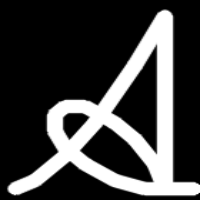

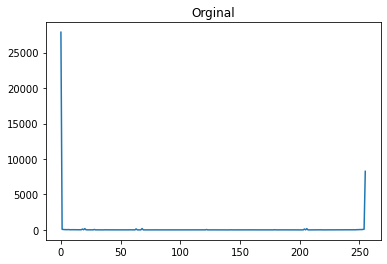

Dilatada 



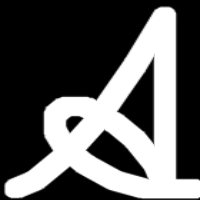

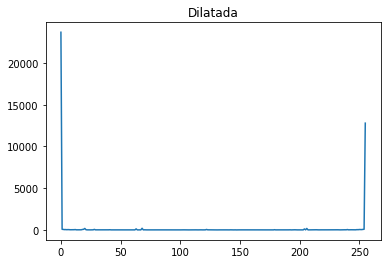

In [ ]:
urlDilatacion = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/4.2 Images/A.png"
img_Dilatacion = cv.imread(urlDilatacion,cv.IMREAD_GRAYSCALE) 
img_Dilatacion = cv.resize(img_Dilatacion, (200,200))

kernel = np.ones((7,7),np.uint8)
dilatacion = cv.dilate(img_Dilatacion,kernel,iterations = 1)

print("Orginal \n")
cv2_imshow(img_Dilatacion)
gethistogram(img_Dilatacion,"Orginal")


print("Dilatada \n")
cv2_imshow(dilatacion)
gethistogram(dilatacion,"Dilatada")

##3. Investigar una aplicación de opening y closing e implementalo en Google Colab

### Opening
La apertura es simplemente otro nombre para erosión seguida de dilatación. Como se explicó anteriormente, es útil para eliminar el ruido.

Orginal 



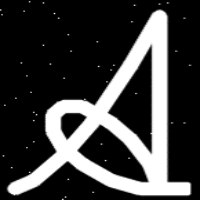

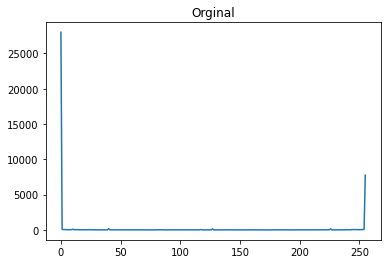

Abierta 



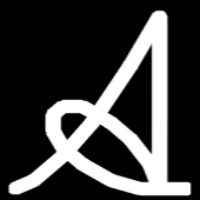

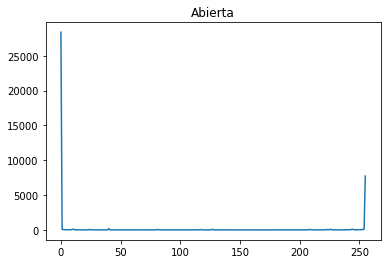

In [ ]:
urlOpCLo = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/4.2 Images/Opening.png"
img_OpeClo = cv.imread(urlOpCLo,cv.IMREAD_GRAYSCALE) 
img_OpeClo = cv.resize(img_OpeClo, (200,200))

kernel = np.ones((7,7),np.uint8)
	
opening = cv.morphologyEx(img_OpeClo, cv.MORPH_OPEN, kernel)

print("Orginal \n")
cv2_imshow(img_OpeClo)
gethistogram(img_OpeClo,"Orginal")

print("Abierta \n")
cv2_imshow(opening)
gethistogram(opening,"Abierta")

### Closing
El Cierre es el opuesto de Apertura, es decir, dilatación seguida de erosión. Es útil para cerrar pequeños agujeros dentro de los objetos de primer plano, o pequeños puntos negros en el objeto. 

Orginal 



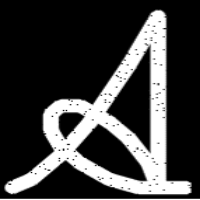

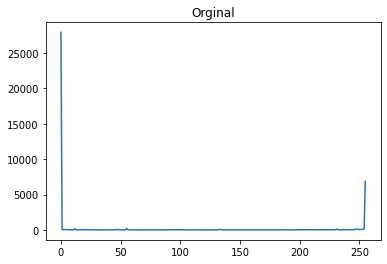

Cerrada 



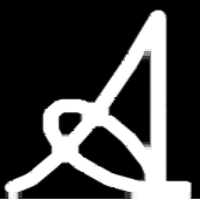

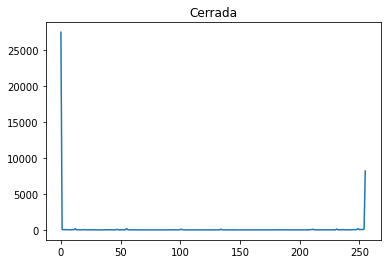

In [ ]:
urlOpCLo = "/content/drive/MyDrive/Colab Notebooks/Computo imagen y video/4.2 Images/Closing.png"
img_OpeClo = cv.imread(urlOpCLo,cv.IMREAD_GRAYSCALE) 
img_OpeClo = cv.resize(img_OpeClo, (200,200))

kernel = np.ones((7,7),np.uint8)

closing = cv.morphologyEx(img_OpeClo, cv.MORPH_CLOSE, kernel)

print("Orginal \n")
cv2_imshow(img_OpeClo)
gethistogram(img_OpeClo,"Orginal")

print("Cerrada \n")
cv2_imshow(closing)
gethistogram(closing,"Cerrada")

#Referencias

- DigitalSreeni. (21 de mayo de 2019). 28 - Thresholding and morphological operations using openCV in Python [Archivo de video]. Youtube. https://www.youtube.com/watch?v=WQK_oOWW5Zo

- Gonzalez, R. & Woods, R. (2018). Digital Image Processing.  4° Edition. Pearson.

- OpenCV. (2022). Morphological Transformations. Obtenido de https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html

- ProgrammingKnowledge. (8 de mayo de 2019). OpenCV Python Tutorial For Beginners 17 _ Morphological Transformations [Archivo de video]. Youtube. https://www.youtube.com/watch?v=xSzsD4kXhRw

- Ruiz, G. O. (2022). Tema 2.4 Operaciones Basicas. Mexico: ITESM.

- Singh, R. (11 de 08 de 2020). Morphological Transformations of Images using OpenCV | Image Processing Part-2. Obtenido de https://medium.com/analytics-vidhya/morphological-transformations-of-images-using-opencv-image-processing-part-2-f64b14af2a38

- Unipython. (2019). TRANSFORMACIONES MORFOLÓGICAS. Obtenido de https://unipython.com/transformaciones-morfologicas/

